In [1]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from fs_detr_dataset import PretrainingDataset
import matplotlib.patches as patches

# Pretaining dataset - Dataloader

In [2]:

# Define your transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Initialize dataset and dataloader
dataset = PretrainingDataset(
    root_dir='/home/enrique/Downloads/ILSVRC2017_DET_test_new/ILSVRC/Data/DET/test',
    transform=transform,
    top_k=10
)
dataloader = DataLoader(dataset, batch_size=5, shuffle=False)



/home/enrique/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/enrique/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/enrique/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 99.2MB/s]


/home/enrique/.local/lib/python3.10/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/home/enrique/.local/lib/python3.10/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/home/enrique/.local/lib/python3.10/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warning

torch.Size([5, 3, 224, 224])


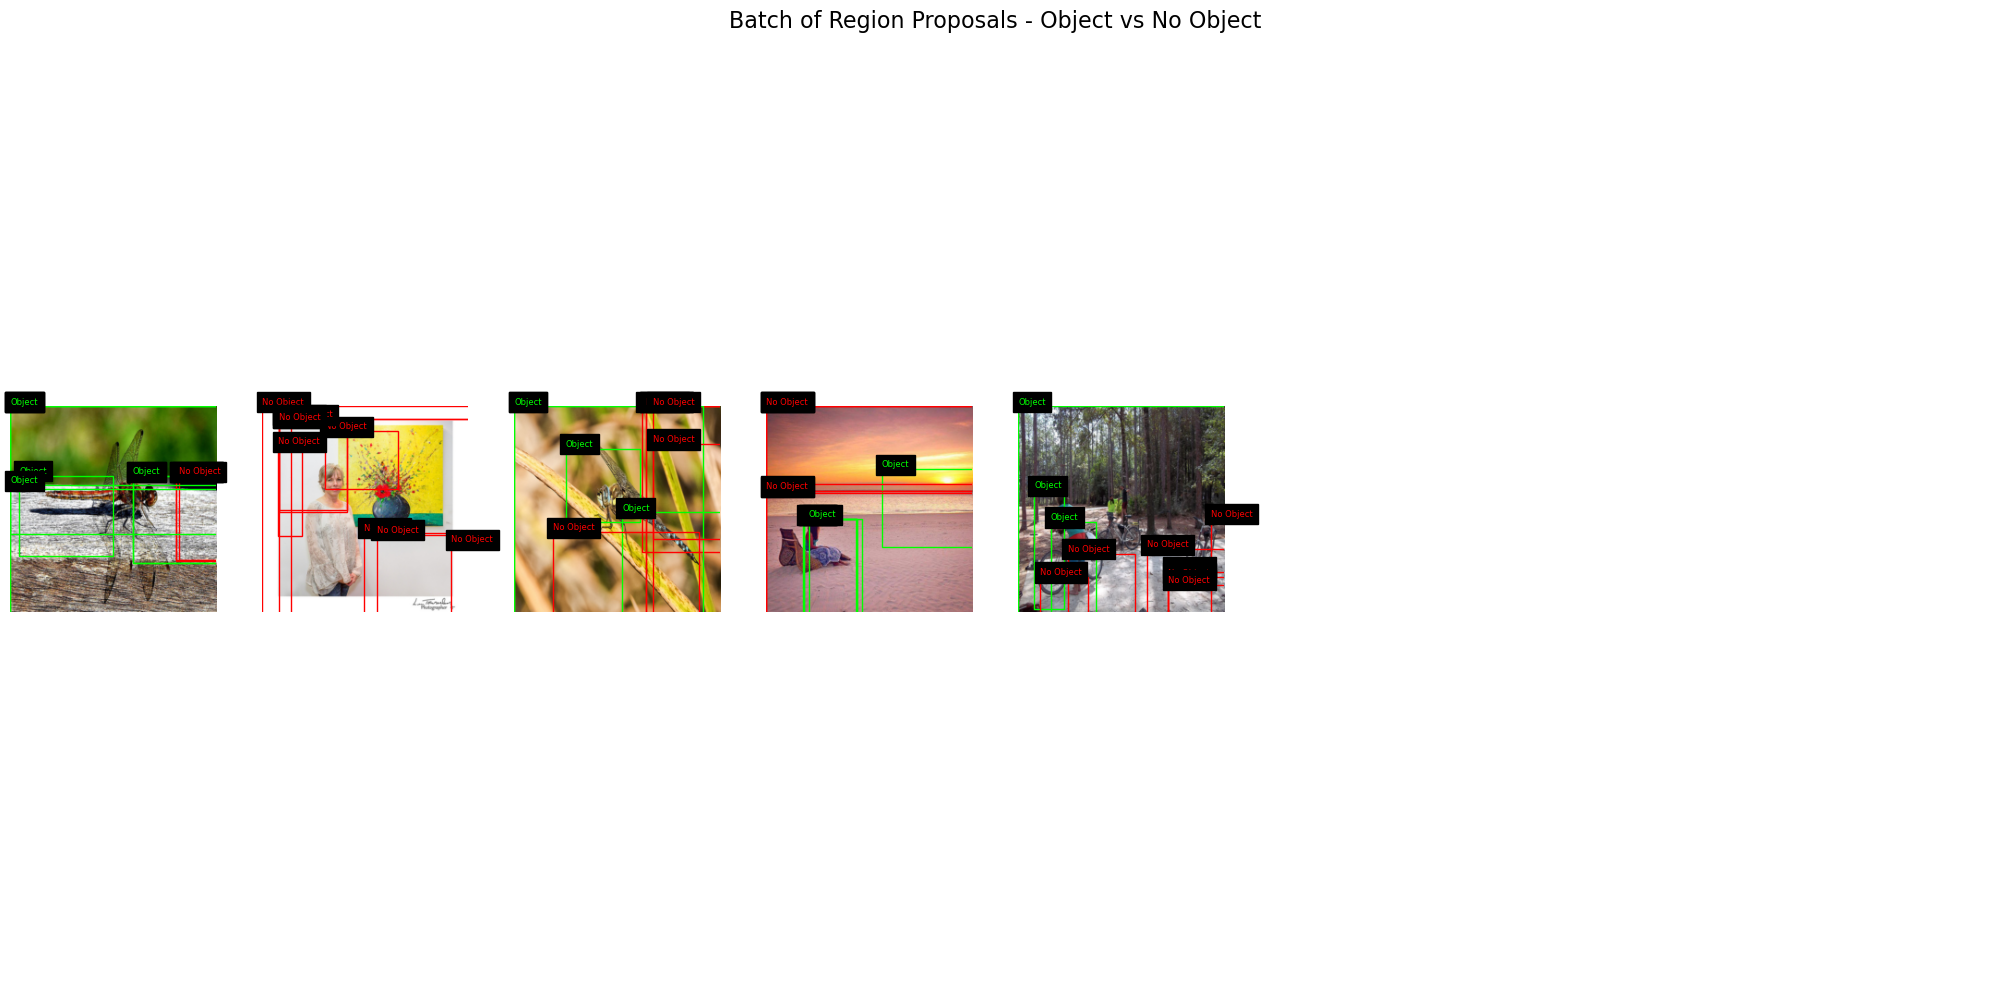

In [3]:

for images, boxes_batch, labels_batch in dataloader:
    batch_size, _, height, width = images.shape

    # Create a grid of subplots
    fig, axs = plt.subplots(nrows=batch_size // 8 + (1 if batch_size % 8 else 0), ncols=8, figsize=(20, 10))
    axs = axs.flatten()

    for idx in range(batch_size):
        image = images[idx]
        boxes = boxes_batch[idx]
        labels = labels_batch[idx]

        np_img = image.permute(1, 2, 0).numpy()
        ax = axs[idx]
        ax.imshow(np_img)
        ax.axis('off')

        for box, label in zip(boxes, labels):
            x1, y1, x2, y2 = box
            x = x1 * width
            y = y1 * height
            w = (x2 - x1) * width
            h = (y2 - y1) * height

            # Green for object, red for background
            color = 'lime' if label == 1 else 'red'
            label_text = 'Object' if label == 1 else 'No Object'

            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y - 2, label_text, fontsize=6, color=color, backgroundcolor='black')

    # Hide unused subplots
    for i in range(batch_size, len(axs)):
        axs[i].axis('off')

    plt.suptitle('Batch of Region Proposals - Object vs No Object', fontsize=16)
    plt.tight_layout()
    plt.show()
    break